## Data Analytics Questions

You were given a 'practice_dataset.csv' dataset, that contains data about average salary of some school graduates.
Please read in this file here, and explore it.

In [207]:
import numpy as np
import pandas as pd

df = pd.read_csv('practice_dataset.csv')
schools = pd.read_json('school_type.json')

## Task 1.
In the dataset there is a 'School Type' column that has numerical values: they are IDs for keys that are given in 'school_type.json' file. Please, map over these IDs to replace them with their keys. Here is an expected outcome:

#### Exploring the dataset

In [208]:
df.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),1,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),1,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,1,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",1,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,1,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [209]:
schools

,ID,VALUE
0,1,Engineering
1,2,Party
2,3,Liberal Arts
3,4,Ivy League
4,5,State


In [210]:
df['School Type'] = df['School Type'].replace(list(schools['ID']), list(schools['VALUE']))
df['School Type'].head(30)

0     Engineering
1     Engineering
2     Engineering
3     Engineering
4     Engineering
5     Engineering
6     Engineering
7     Engineering
8     Engineering
9     Engineering
10    Engineering
11    Engineering
12    Engineering
13    Engineering
14    Engineering
15    Engineering
16    Engineering
17    Engineering
18    Engineering
19          Party
20          Party
21          Party
22          Party
23          Party
24          Party
25          Party
26          Party
27          Party
28          Party
29          Party
Name: School Type, dtype: object

## Task 2
We defined a function that takes any 'School Type' value, and estimates rounded average 'Mid-Career Median Salary'for it. However, our funciton is not working. Please find an error and try to fix it.

In [211]:
def function_1(school_type):
    without_sign = df[df['School Type']==school_type]['Mid-Career Median Salary'].replace({'\$': '', ' ': '', ',': ''}, regex=True)
    mid_career_float = pd.to_numeric(without_sign, downcast='float')
    result = mid_career_float.mean()
    return result

In [212]:
for i in schools['VALUE']:
    print(f"{i}: ${function_1(i):.2f}")

Engineering: $103842.10
Party: $84685.00
Liberal Arts: $89378.73
Ivy League: $120125.00
State: $78567.43



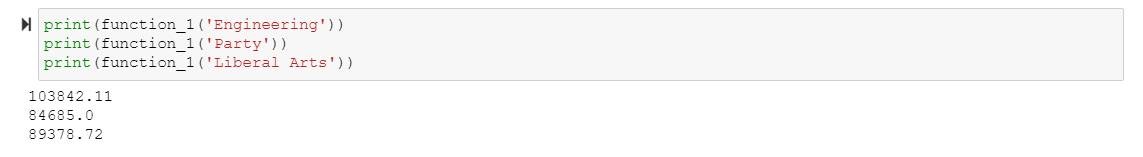

## Task 3
According to the National Occupational Employment and Wages Estimates, the average salary in the United States is 56,310 USD annaully. Iterate over 'Starting Median Salary' column and assign value 'more than national average' if it is more than 56,310 USD, else 'less than national average'. The result is supposed to be as such:


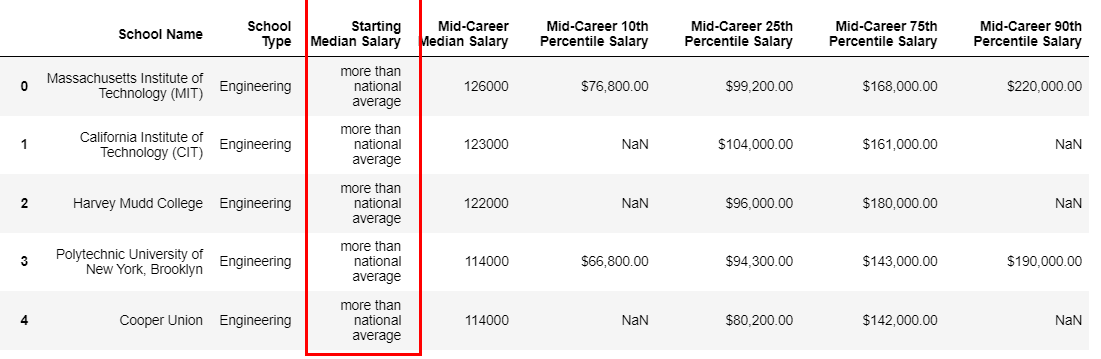

In [213]:
national_avg = 56310
column = 'Starting Median Salary'
without_sign = df[column].replace({'\$': '', ' ': '', ',': ''}, regex=True) # if the program would be bigger I will replace with a separate function
numeric_starting_median = pd.to_numeric(without_sign, downcast='float')

condition = numeric_starting_median > national_avg

df[column] = np.where(condition, 'more than national average', 'less than national average')

State schools that have more than national average salary.

In [214]:
df[df['Starting Median Salary'] == 'more than national average']

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,more than national average,"$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,more than national average,"$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,more than national average,"$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,more than national average,"$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,more than national average,"$114,000.00",NaN,"$80,200.00","$142,000.00",NaN
5,Worcester Polytechnic Institute (WPI),Engineering,more than national average,"$114,000.00","$80,000.00","$91,200.00","$137,000.00","$180,000.00"
6,Carnegie Mellon University (CMU),Engineering,more than national average,"$111,000.00","$63,300.00","$80,100.00","$150,000.00","$209,000.00"
7,Rensselaer Polytechnic Institute (RPI),Engineering,more than national average,"$110,000.00","$71,600.00","$85,500.00","$140,000.00","$182,000.00"
8,Georgia Institute of Technology,Engineering,more than national average,"$106,000.00","$67,200.00","$85,200.00","$137,000.00","$183,000.00"
9,Colorado School of Mines,Engineering,more than national average,"$106,000.00","$62,200.00","$87,900.00","$142,000.00","$201,000.00"


Now, display all state schools that have less than national average salary.

In [215]:
df[df['Starting Median Salary'] == 'less than national average']

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
11,Illinois Institute of Technology (IIT),Engineering,less than national average,"$97,800.00","$56,100.00","$77,400.00","$121,000.00","$165,000.00"
12,Wentworth Institute of Technology,Engineering,less than national average,"$96,700.00","$55,200.00","$74,000.00","$117,000.00","$153,000.00"
13,Virginia Polytechnic Institute and State Unive...,Engineering,less than national average,"$95,400.00","$50,600.00","$71,400.00","$124,000.00","$163,000.00"
14,South Dakota School of Mines & Technology,Engineering,less than national average,"$93,400.00","$71,500.00","$81,900.00","$122,000.00","$147,000.00"
15,New Mexico Institute of Mining and Technology ...,Engineering,less than national average,"$93,400.00",NaN,"$67,400.00","$123,000.00",NaN
...,...,...,...,...,...,...,...,...
264,Austin Peay State University,State,less than national average,"$59,200.00","$32,200.00","$40,500.00","$73,900.00","$96,200.00"
265,Pittsburg State University,State,less than national average,"$58,200.00","$25,600.00","$46,000.00","$84,600.00","$117,000.00"
266,Southern Utah University,State,less than national average,"$56,500.00","$30,700.00","$39,700.00","$78,400.00","$116,000.00"
267,Montana State University - Billings,State,less than national average,"$50,600.00","$22,600.00","$31,800.00","$78,500.00","$98,900.00"


## Task4
You might have realised that some columns have missing values. Display all rows that has at least one missing value in any column. Then, consider how would you handle these missing values? Please, describe below your thoughts

#### It depends on the situation, if we are dealing with the numerical column, and we have missing or garbage values we can consider them replacing with 0. If the number of garbage or missing values makes up the majority part of them, for example 70% we can consider dropping those columns and rows

In [216]:
df[df.isna().any(axis=1)]

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
1,California Institute of Technology (CIT),Engineering,more than national average,"$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,more than national average,"$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
4,Cooper Union,Engineering,more than national average,"$114,000.00",NaN,"$80,200.00","$142,000.00",NaN
15,New Mexico Institute of Mining and Technology ...,Engineering,less than national average,"$93,400.00",NaN,"$67,400.00","$123,000.00",NaN
31,Randolph-Macon College,Party,less than national average,"$83,600.00",NaN,"$54,100.00","$123,000.00",NaN
41,Amherst College,Liberal Arts,less than national average,"$107,000.00",NaN,"$84,900.00","$162,000.00",NaN
43,Bowdoin College,Liberal Arts,less than national average,"$107,000.00",NaN,"$74,600.00","$146,000.00",NaN
44,College of the Holy Cross,Liberal Arts,less than national average,"$106,000.00",NaN,"$65,600.00","$143,000.00",NaN
45,Occidental College,Liberal Arts,less than national average,"$105,000.00",NaN,"$54,800.00","$157,000.00",NaN
46,Washington and Lee University,Liberal Arts,less than national average,"$104,000.00",NaN,"$82,800.00","$146,000.00",NaN


## Task 5
Please visit this web page: https://www.upgradabroad.com/articles/forbes-unveils-americas-top-colleges-2022-list-news/
It contains several tables, that show some university rankings. Scroll till you reach "Forbes college rankings" field. First, scrape HTML table from this field and save as forbes_ranking. Then, write a function that creates new column "Ranked on Forbes" in practice_dataset and accepts Boolean values (True or False) based on the fact whether this university in forbes_ranking or not. Final result should look as follows:


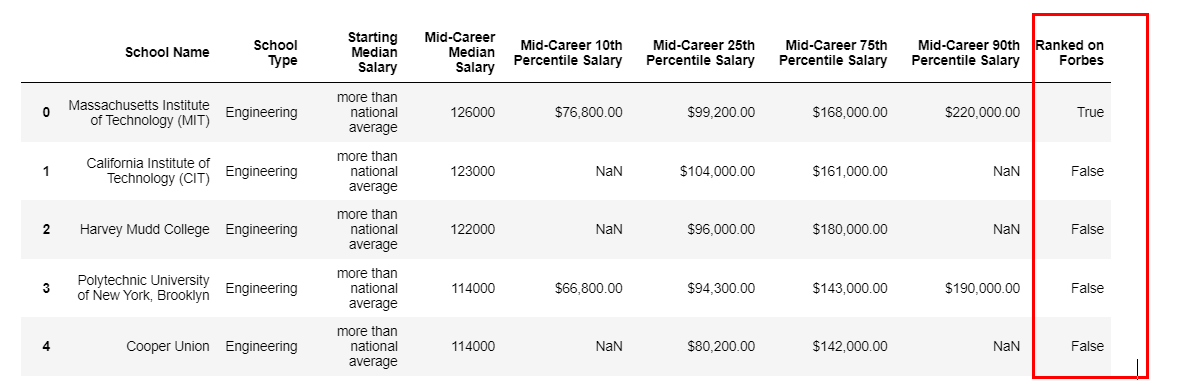

In [217]:
import requests
from bs4 import BeautifulSoup

url = "https://www.upgradabroad.com/articles/forbes-unveils-americas-top-colleges-2022-list-news/"
data = requests.get(url).text

le_potage = BeautifulSoup(data, 'html.parser')
table = le_potage.find('table')

forbes_ranking = pd.DataFrame(columns=['Rank', 'College'])

In [218]:
for row in table.tbody.find_all('tr'):
    columns = row.find_all('td')
    if columns[0].text.strip() == 'Rank':
        continue
    rank = columns[0].text.strip()
    college = columns[1].text.strip()

    forbes_ranking = pd.concat([forbes_ranking, pd.DataFrame.from_records([{'Rank': rank, 'College': college}])])
forbes_ranking

,Rank,College
0,1,Massachusetts Institute of Technology
0,2,Stanford University
0,2,"University of California, Berkeley"
0,4,Princeton University
0,5,Columbia University
0,6,"University of California, Los Angeles"
0,7,Williams College
0,8,Yale University
0,9,Duke University
0,10,University of Pennsylvania


In [222]:
df['Ranked on Forbes'] = df['School Name'].apply(lambda x: True if forbes_ranking['College'].str.contains(x).any() else False)

/tmp/ipykernel_5139/2823182713.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['Ranked on Forbes'] = df['School Name'].apply(lambda x: True if forbes_ranking['College'].str.contains(x).any() else False)


In [223]:
df

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Ranked on Forbes
0,Massachusetts Institute of Technology (MIT),Engineering,more than national average,"$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",False
1,California Institute of Technology (CIT),Engineering,more than national average,"$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,False
2,Harvey Mudd College,Engineering,more than national average,"$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,False
3,"Polytechnic University of New York, Brooklyn",Engineering,more than national average,"$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",False
4,Cooper Union,Engineering,more than national average,"$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,False
...,...,...,...,...,...,...,...,...,...
264,Austin Peay State University,State,less than national average,"$59,200.00","$32,200.00","$40,500.00","$73,900.00","$96,200.00",False
265,Pittsburg State University,State,less than national average,"$58,200.00","$25,600.00","$46,000.00","$84,600.00","$117,000.00",False
266,Southern Utah University,State,less than national average,"$56,500.00","$30,700.00","$39,700.00","$78,400.00","$116,000.00",False
267,Montana State University - Billings,State,less than national average,"$50,600.00","$22,600.00","$31,800.00","$78,500.00","$98,900.00",False


## Task 6
If time spent by website visitors on two different landing pages could be drawn as below, so that average time spent is the same for both. Based on the graph solely, what do you think what landing page (red or purple) performes better and why?


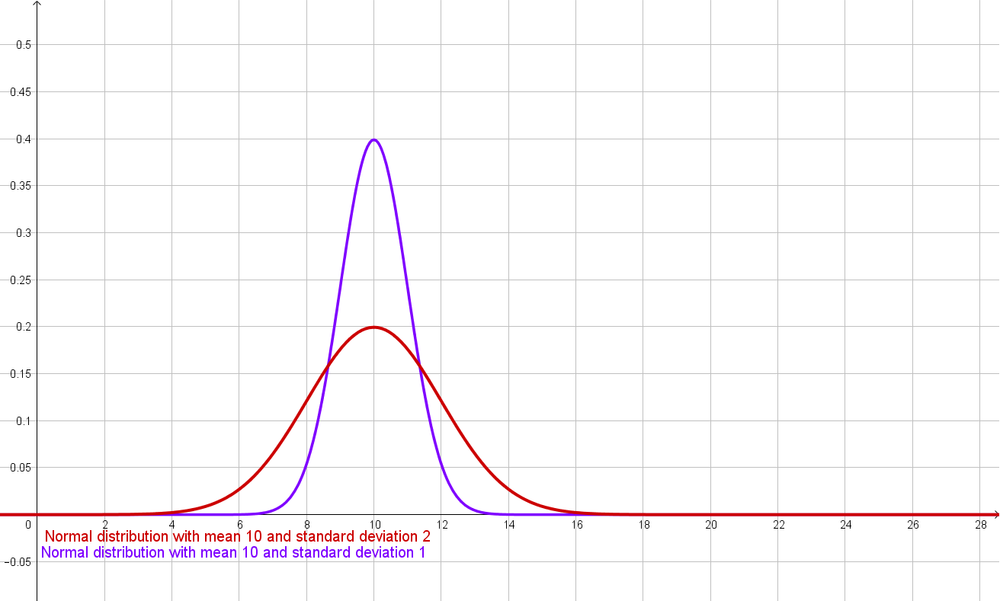

### Landing page with a blue graph performs better while it is *not* the same for the red one. On the blue graph we can see that there is a high probability that users will spend 10 points of time on the landing page, while probability of spending 10 points of time on the red graph is 0.2.

## Task 7
if a die is thrown 6 times, what is the probability of 3 of the numbers being even numbers?

### Using the triangle of the Pascal we can get that the number of various arrangements when there are 3 of the numbers thrown 6 times is *20*. p=1/2, q=1/2. When x=3, P(x) = 20 * (q)^x * (p)^x = 20/64 = 0.31250. We have 31.250% probability
